# UTS

Nama : Siti Ulun Nuha Karimah

NIM : 200411100127

Kelas : Penambangan Data A


# KNN
KNN (K-Nearest Neighbor) adalah algoritma klasifikasi terawasi sederhana yang dapat kita gunakan untuk menetapkan kelas ke titik data baru. Hal ini dapat digunakan untuk regresi juga, KNN tidak membuat asumsi pada distribusi data, sehingga non-parametrik. Itu menyimpan semua data pelatihan untuk membuat prediksi masa depan dengan menghitung kesamaan antara sampel input dan setiap instance pelatihan.

Kali ini membangun model KNN yang mengklasifikasikan spesies baru berdasarkan ukuran sepal dan petal. Dataset Iris tersedia di scikit-learn dan kita dapat menggunakannya untuk membangun KNN kita.





Langkah1: Impor data yang diperlukan dan periksa fitur-fiturnya.

Impor fungsi load_iris dari modul set data scikit-learen dan buat objek iris Bunch (bunch adalah tipe objek khusus scikitlearn untuk menyimpan set data dan atributnya).

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [8]:
url = 'https://raw.githubusercontent.com/SitiUlunNuhaKarimah127/datamining/main/dataR2.csv'
dataset = pd.read_csv(url)

dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [9]:
#check number of rows and columns in dataset
dataset.shape

(116, 10)

In [12]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['Classification'])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [13]:
#separate target values
y = dataset['Classification'].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [14]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [19]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

# Decision Tree

Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Reading the dataR2.csv file 
URL = pd.read_csv("https://raw.githubusercontent.com/SitiUlunNuhaKarimah127/datamining/main/dataR2.csv")
dataset.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [24]:
#Data points count value for each class labels..
dataset.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

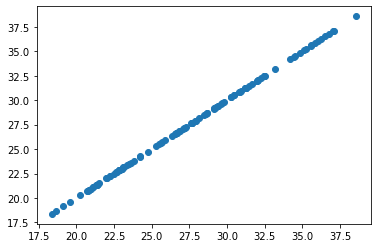

In [26]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(dataset['BMI'],dataset['BMI'])
plt.show()

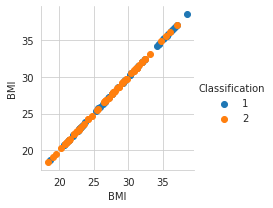

In [27]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue = 'Classification') \
   .map(plt.scatter, 'BMI','BMI') \
   .add_legend()

plt.show()

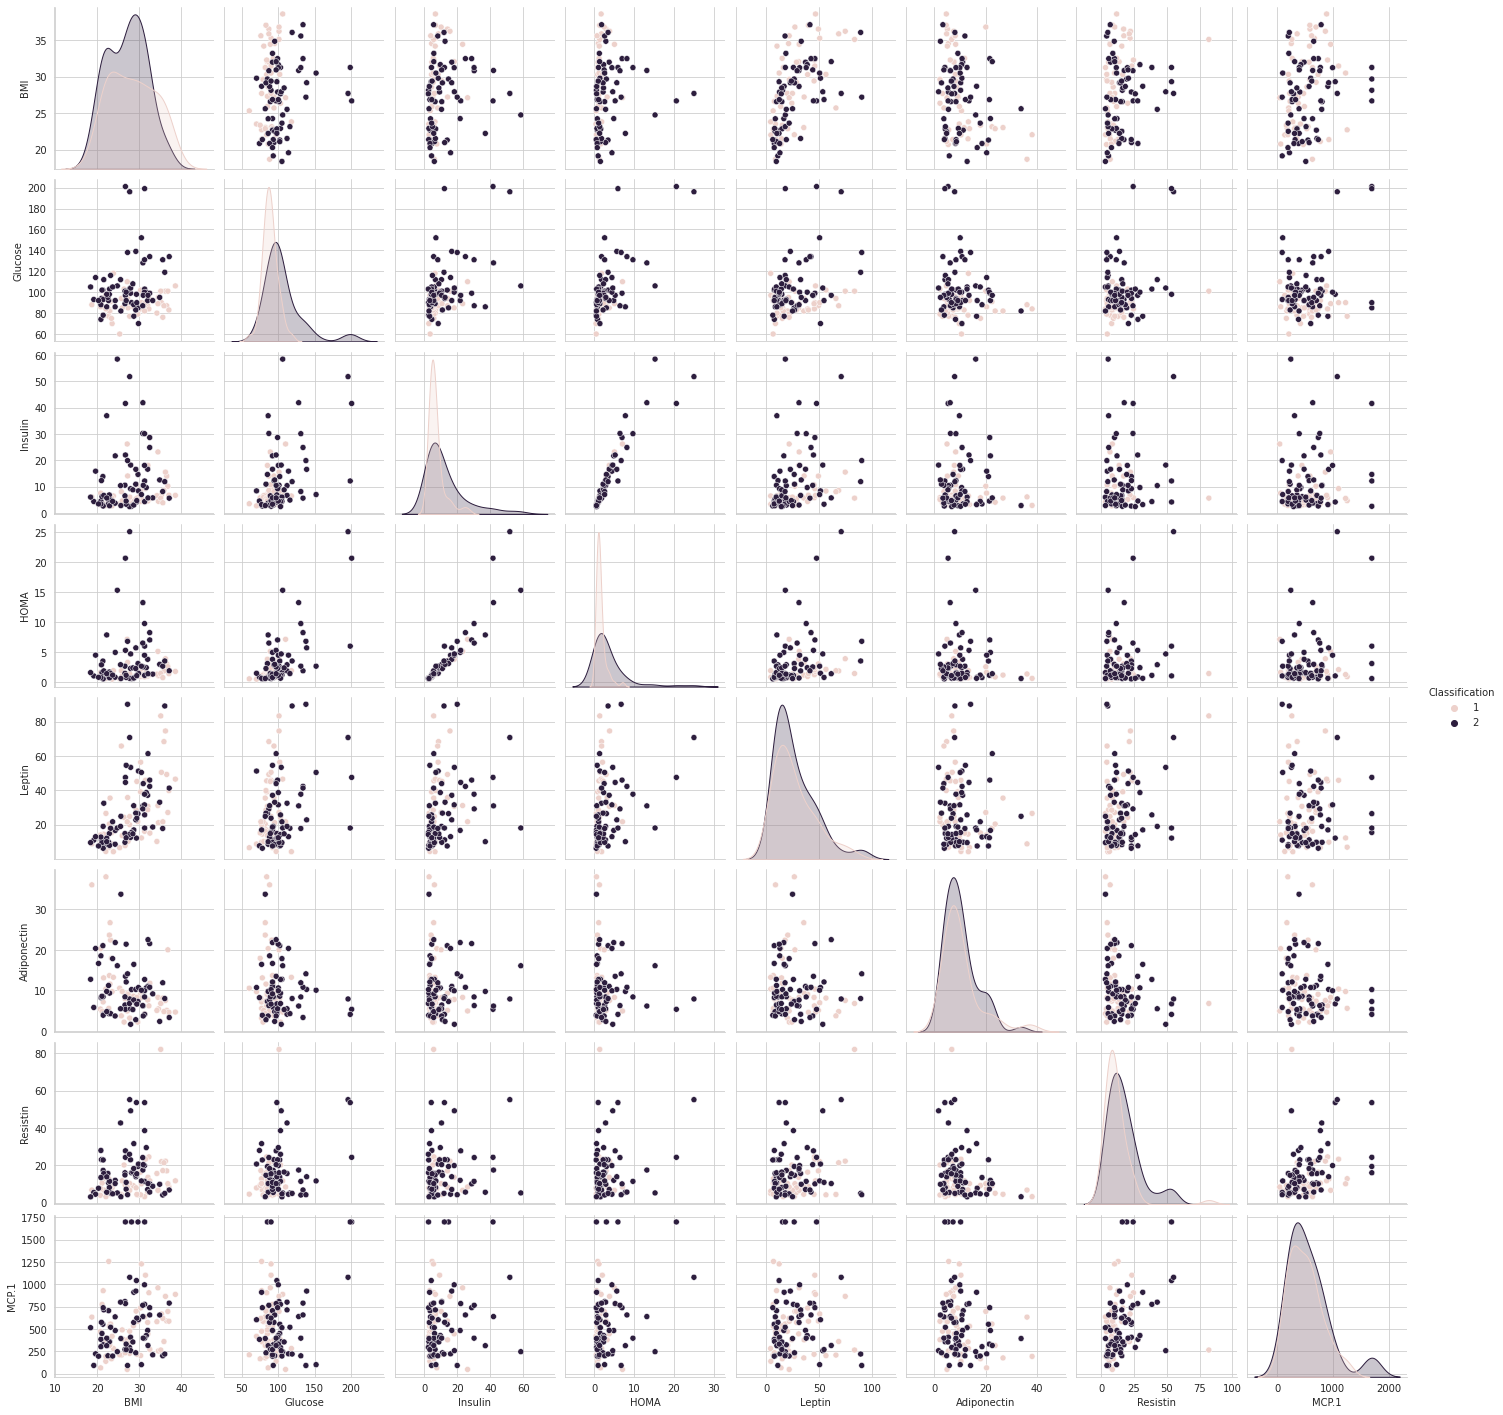

In [29]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(dataset.drop(['Age'],axis=1), hue='Classification')
plt.show()

In [30]:
#Just trying to explore some new feature using the given data...

dataset['BMI_diff'] = dataset['BMI']-dataset['BMI']
dataset['BMI_diff'] = dataset['BMI']-dataset['BMI']
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,BMI_diff
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0.0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0.0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0.0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0.0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,0.0
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,0.0
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,0.0
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,0.0


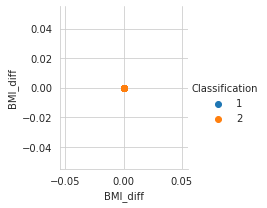

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

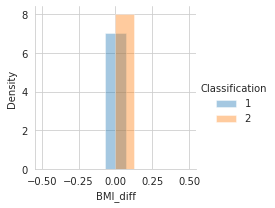

In [35]:
#Analysed new feature to get some more infomation apart form existing ones...

sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Classification')\
   .map(plt.scatter,'BMI_diff','BMI_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Classification')\
   .map(sns.distplot,'BMI_diff')\
   .add_legend()
plt.show() 

In [36]:
dataset['BMI_len_diff'] = dataset['BMI']-iris_data['BMI']
dataset['BMI_width_diff'] = dataset['BMI']-dataset['BMI']
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,BMI_diff,BMI_len_diff,BMI_width_diff
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0.0,0.0,0.0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0.0,0.0,0.0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0.0,0.0,0.0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0.0,0.0,0.0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,0.0,0.0,0.0
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,0.0,0.0,0.0
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,0.0,0.0,0.0
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,0.0,0.0,0.0


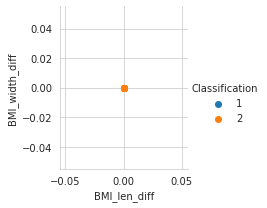

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


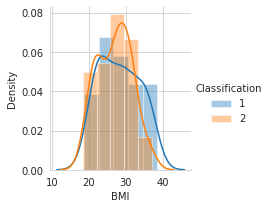

In [37]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Classification')\
   .map(plt.scatter,'BMI_len_diff','BMI_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris_data,hue='Classification')\
   .map(sns.distplot,'BMI')\
   .add_legend()
plt.show()

In [38]:
dataset['BMI_len_wid_diff'] = dataset['BMI']-dataset['BMI']
dataset['BMI_wid_len_diff'] = dataset['BMI']-dataset['BMI']
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,BMI_diff,BMI_len_diff,BMI_width_diff,BMI_len_wid_diff,BMI_wid_len_diff
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,0.0,0.0,0.0,0.0,0.0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,0.0,0.0,0.0,0.0,0.0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,0.0,0.0,0.0,0.0,0.0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,0.0,0.0,0.0,0.0,0.0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,0.0,0.0,0.0,0.0,0.0
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,0.0,0.0,0.0,0.0,0.0
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,0.0,0.0,0.0,0.0,0.0
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,0.0,0.0,0.0,0.0,0.0


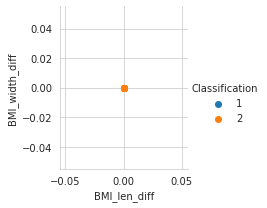

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


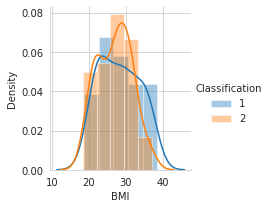

In [39]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Classification')\
   .map(plt.scatter,'BMI_len_diff','BMI_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris_data,hue='Classification')\
   .map(sns.distplot,'BMI')\
   .add_legend()
plt.show()

[Text(0.45145631067961167, 0.96875, 'X[3] <= 33.677\ngini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.1941747572815534, 0.90625, 'X[2] <= 21.757\ngini = 0.464\nsamples = 63\nvalue = [23, 40]'),
 Text(0.11650485436893204, 0.84375, 'X[3] <= 20.824\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.07766990291262135, 0.78125, 'X[3] <= 19.912\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.038834951456310676, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.11650485436893204, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1553398058252427, 0.78125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.27184466019417475, 0.84375, 'X[2] <= 22.12\ngini = 0.477\nsamples = 56\nvalue = [22, 34]'),
 Text(0.23300970873786409, 0.78125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3106796116504854, 0.78125, 'X[0] <= 22.678\ngini = 0.466\nsamples = 54\nvalue = [20, 34]'),
 Text(0.27184466019417475, 0.71875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Te

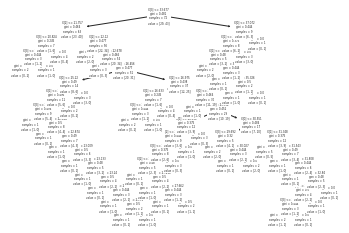

In [42]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from dataset'''


X = dataset[['BMI', 'BMI','BMI', 'BMI','BMI_wid_len_diff','BMI_width_diff']]
y = dataset['Classification']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(iris_clf)